# Tarea 1


CC5113 - Aprendizaje Automático Bayesiano

Profesor: Pablo Guerrero

Autor: Martín Cornejo

## Paquetes necesarios

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pdb

In [27]:
data = np.genfromtxt('data_out.txt', delimiter=' ')
#x = data[:,0]
#y = data[:,1]

np.random.shuffle(data)
training, test = data[:375,:], data[375:,:]

#pdb.set_trace()
True

True

### A continuación se grafica la data:

Text(0,0.5,'Y')

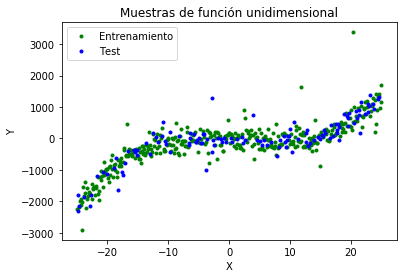

In [28]:
#mpl.rcParams['figure.figsize'] = (3,3)
plt.figure()
plt.plot(training[:,0],training[:,1], 'g.')
plt.plot(test[:,0],test[:,1], 'b.')
plt.title("Muestras de función unidimensional")
plt.legend(["Entrenamiento", "Test"])
plt.xlabel("X")
plt.ylabel("Y")

# P1 Regresión Lineal

### Regresión lineal

Sabemos que para la regresión lineal regularizada, los parámetros $\theta$ (parámetros del modelo) tienen la forma:
\begin{equation}
\theta = (\tilde{X}^{T}\tilde{X} + \rho I)^{-1} \tilde{X}^{T}Y
\end{equation}

Dado que este es el caso en que $x \rightarrow f(x) \ \epsilon \ \rm I\!R \rightarrow \rm I\!R$, tenemos que $\tilde{X}$ tiene la forma

\begin{equation}
\tilde{X} = \begin{bmatrix}
           x_{1} & 1\\
           x_{2} & 1\\
           \vdots & \vdots \\
           x_{N} & 1
         \end{bmatrix}
, \ Y = \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{N} 
         \end{bmatrix}
\end{equation}

Para simplificar el problema usaremos un parámetro de regularización $\rho = 0$

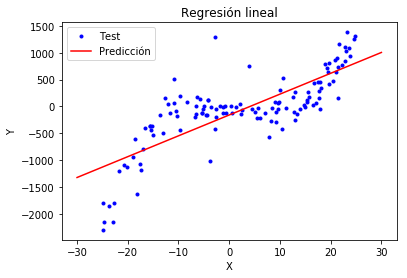

In [29]:
x_tilda = np.array([training[:,0], np.ones(len(training[:,0]))]).transpose()
y_reg = training[:,1]
rho = 0
identidad = np.identity(2)

def get_theta(rho):
    mul1 = np.linalg.inv(
        np.add(
            np.matmul(x_tilda.transpose(), x_tilda), 
            np.dot(identidad, rho)))
    mul2 = np.matmul(x_tilda.transpose(), y_reg)
    return np.matmul(mul1, mul2)

def recta(x, rho): 
    theta = get_theta(rho)
    return x * theta[0] + theta[1]

x_recta = np.linspace(-30, 30, 10)
plt.figure()
plt.plot(test[:,0],test[:,1], 'b.')
plt.title("Regresión lineal")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(
    x_recta,
    recta(x_recta, rho),
    'r')
plt.legend(["Test", "Predicción"])

### Comparando con polyfit

Es claro observar que el resultado de __polyfit__ es equivalente a usar nuestro resultado usando $\rho = 0$, es más notamos que los parámetros de ambas rectas son casi idénticos:

In [30]:
print("Theta polyfit: ", np.polyfit(training[:,0],training[:,1], 1))
print("Theta formula: ", get_theta(0))

Theta polyfit:  [  38.79309574 -159.01832539]
Theta formula:  [  38.79309574 -159.01832539]


### Error cuadrático 

In [31]:
def errorCuadratico(x, pred, labels):
    error2 = np.sum(np.power(np.absolute(np.subtract(labels, pred)), 2))
    
    return error2

print("El error cuadratico del train es: " + str(errorCuadratico(training[:,0],recta(training[:,0], rho), training[:,1])))
print("")
print("El error cuadratico del test es: " + str(errorCuadratico(test[:,0],recta(test[:,0], rho), test[:,1])))

El error cuadratico del train es: 76559580.3369045

El error cuadratico del test es: 23880425.662425


# P2 Kernel Regression

### Kernel Polinomial


El error cuadratico del train es: 34050753.326247945

El error cuadratico del test es: 9232176.105652189


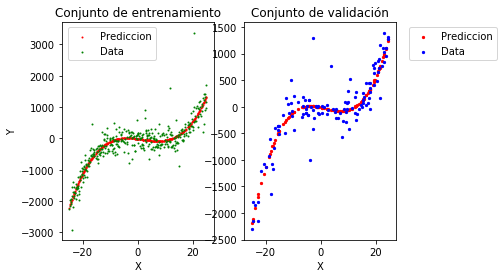

In [52]:
grado = 3

identity_size = grado + 1

x_tilda = np.array([training[:,0], np.ones(len(training[:,0]))]).transpose()
y_reg = training[:,1]

for grado in range(2, grado + 1):
    x_tilda = np.append(np.array(np.power(training[:,0],grado))[np.newaxis].transpose(), x_tilda, axis=1)

identidad = np.identity(identity_size)

def get_theta_pol(rho):
    mul1 = np.linalg.inv(
        np.add(
            np.matmul(x_tilda.transpose(), x_tilda), 
            np.dot(identidad, rho)))
    mul2 = np.matmul(x_tilda.transpose(), y_reg)
    return np.matmul(mul1, mul2)

def poly(x, rho): 
    theta = get_theta_pol(rho)
    #print("Theta polyfit: ", np.polyfit(training[:,0],y_reg, grado))
    #print("Theta formula: ", get_theta_pol(rho))
    
    p = np.poly1d(theta)
    return p(x)

#salida = recta(x_te, 0)
#pdb.set_trace()

rho = 0

f, figures = plt.subplots(1, 2)
figures[0].scatter(training[:,0],poly(training[:,0], rho), c ='r', s=1) 
figures[0].scatter(training[:,0],training[:,1], c='g', s=1)
figures[0].set_xlabel("X")
figures[0].set_ylabel("Y")
figures[0].set_title("Conjunto de entrenamiento")
figures[0].legend(["Prediccion","Data"], bbox_to_anchor=(0.65, 1))

figures[1].scatter(test[:,0],poly(test[:,0], rho), c ='r', s=5) 
figures[1].scatter(test[:,0],test[:,1], c='b', s=5) 
figures[1].set_xlabel("X")
figures[1].set_title("Conjunto de validación")
figures[1].legend(["Prediccion","Data"], bbox_to_anchor=(1.05, 1))

print("")
print("El error cuadratico del train es: " + str(errorCuadratico(training[:,0],poly(training[:,0], rho), training[:,1])))
print("")
print("El error cuadratico del test es: " + str(errorCuadratico(test[:,0],poly(test[:,0], rho), test[:,1])))